In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
from datetime import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Girija Joshi\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Girija Joshi\anaconda3\envs\

In [2]:
# getting names of all the files in IDC_regular_ps50_idx5and sub dirs
print("Please wait getting all images.....")
# files = glob('Resources/IDC_regular_ps50_idx5/*/*/*')
files = glob('C:\BootCamp\BreastCancerClassification\equal_images/*/*/*')
# files = glob('C:\BootCamp\BreastCancerClassification\equal_images/8863/*/*')

# Example : Resources/IDC_regular_ps50_idx5\\10254\\0\\10254_idx5_x1001_y1001_class0.png'

Please wait getting all images.....


In [3]:
# checking how many are cancer files which has class1 in it
count =0 
for file in files:
    if 'class1' in file:
        count+=1

In [4]:
print('------------------')

print(f'Number Of 1: {count}')
print(f'Number Of 0: {len(files) - count}')
# total number of files
print(f'Total: {len(files)}')

------------------
Number Of 1: 68378
Number Of 0: 68378
Total: 136756


Cancer Images


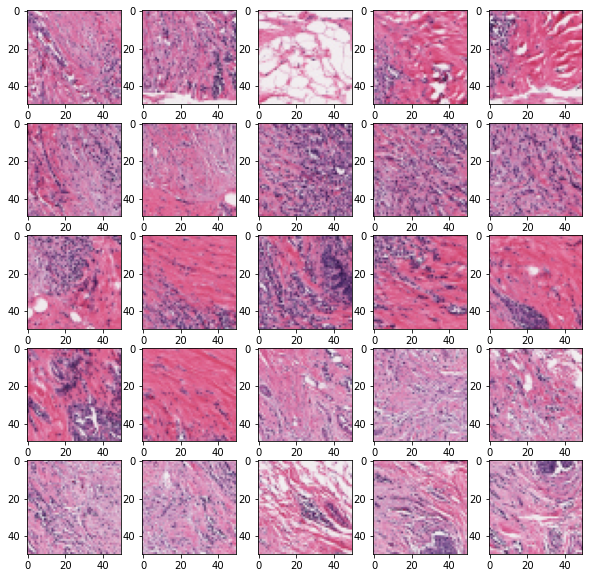

In [5]:
path = os.path.join('C:\BootCamp\BreastCancerClassification\equal_images' + '/10272/1')
print("Cancer Images")
# print(path)
#Plotting the generated images
imgs = os.listdir(path)

_, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    img = plt.imread(path + '/' + img)
    ax.imshow(img)

plt.show()

Non Cancer Images


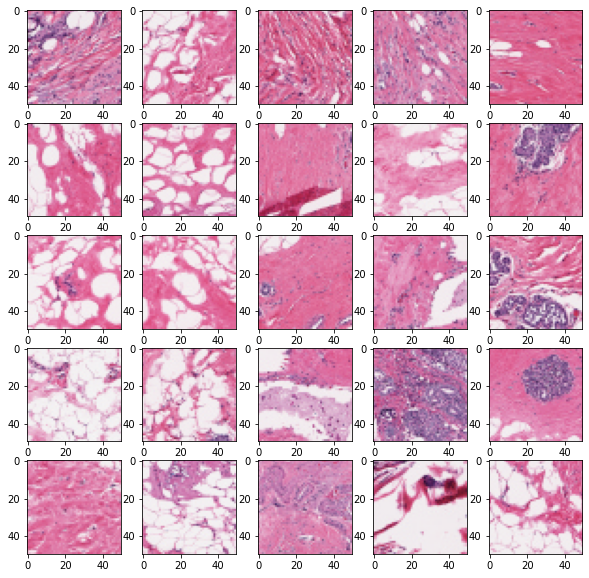

In [6]:
path = os.path.join('C:\BootCamp\BreastCancerClassification\equal_images' + '/10272/0')
print('Non Cancer Images')
#Plotting the generated images
imgs = os.listdir(path)

_, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    img = plt.imread(path + '/' + img)
    ax.imshow(img)

plt.show()

In [7]:
# get 80% of total for training and 20% for testing
train_num = int(len(files) * 0.80)
test_num = len(files) - train_num

In [8]:
# create X and y train data
def find_data(files, lower_limit, upper_limit):
    X = []
    y = []
    
    # tqdm(patient_ids)
    for file in tqdm(files[lower_limit:upper_limit]):
        if file.endswith(".png"):
            # Convering cureent image into PIL image format. PIL image format is RGB format.
            img = tf.keras.preprocessing.image.load_img(file, target_size = (50,50))

            # Keras provides the img_to_array() function for converting a loaded image in PIL format into a NumPy array 
            #for use with deep learning models. The image is convertated into t [height, width, channels]

            # # Arguments
            #         img: PIL Image instance.
            #         data_format: Image data format,
            #             either "channels_first" or "channels_last".
            #         dtype: Dtype to use for the returned array.
            # Returns: A 3D Numpy array.
            
            # The component values are often stored as integer numbers in the range 0 to 255, 
            # the range that a single 8-bit byte can offer,
            pixels = tf.keras.preprocessing.image.img_to_array(img)

            # converting into 0 - 1, This is called as Normalization will help you to remove distortions 
            # caused by lights and shadows in an image.
            pixels /= 255
            X.append(pixels)
            if 'class1' in file:
                y.append(1)
            elif 'class0' in file:
                y.append(0)
    return np.stack(X), y

In [9]:
print(f'Num of training files: {train_num}\nNum of test files:{test_num}')


Num of training files: 109404
Num of test files:27352


In [10]:
X_train,y_train = find_data(files,0, train_num)

100%|█████████████████████████████████████████████████████████████████████████| 109404/109404 [02:32<00:00, 716.93it/s]


In [11]:
X_test, y_test = find_data(files, train_num, len(files))

100%|███████████████████████████████████████████████████████████████████████████| 27352/27352 [00:41<00:00, 666.17it/s]


In [12]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, Activation, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

In [13]:
# X_train2 is 4 diemtion we need to convert in 2D
X_train.shape

(109404, 50, 50, 3)

In [14]:
inp_shape = (50,50,3)
model = Sequential([
    # Conv2D(kernel_size=3, filters=16, padding='same', activation='relu', input_shape=[IMG_SIZE,IMG_SIZE, 3]),
    Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu', input_shape=inp_shape),
    MaxPooling2D(2),
    Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu'),
    MaxPooling2D(2),
    Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [16]:
#Compilation
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# model.compile(optimizer = keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 25, batch_size=1024)

Train on 109404 samples, validate on 27352 samples
Epoch 1/25
109404/109404 [==============================] - 523s 5ms/sample - loss: 0.9125 - accuracy: 0.5903 - val_loss: 0.6145 - val_accuracy: 0.6286
Epoch 2/25
109404/109404 [==============================] - 419s 4ms/sample - loss: 0.5929 - accuracy: 0.7088 - val_loss: 0.4447 - val_accuracy: 0.8062
Epoch 3/25
109404/109404 [==============================] - 402s 4ms/sample - loss: 0.5252 - accuracy: 0.7491 - val_loss: 0.5021 - val_accuracy: 0.8200
Epoch 4/25
109404/109404 [==============================] - 396s 4ms/sample - loss: 0.4877 - accuracy: 0.7721 - val_loss: 0.4188 - val_accuracy: 0.8150
Epoch 5/25
109404/109404 [==============================] - 408s 4ms/sample - loss: 0.4543 - accuracy: 0.7887 - val_loss: 0.3822 - val_accuracy: 0.8350
Epoch 6/25
109404/109404 [==============================] - 398s 4ms/sample - loss: 0.4401 - accuracy: 0.7992 - val_loss: 0.4395 - val_accuracy: 0.8103
Epoch 7/25
109404/109404 [===========

In [18]:
# evaluating and printing results 
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.45450507161273146
Test accuracy: 0.8303232


In [19]:
# save model
model.save('bca.h5')
# model.save_weights('bca_weights.h5')

In [21]:
# pred = model.predict(X_test)
batch_holder = loaded_model.predict_classes(X_test)

res = []
for prediction in batch_holder:
    if(prediction > 0.5):
        res.append(1)
    else:
        res.append(0)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, res))
print(classification_report(y_test, res))


[[10167  3187]
 [ 1454 12544]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81     13354
           1       0.80      0.90      0.84     13998

    accuracy                           0.83     27352
   macro avg       0.84      0.83      0.83     27352
weighted avg       0.84      0.83      0.83     27352

